In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from timeit import default_timer as timer
from sklearn.linear_model import LinearRegression as LR
import warnings
warnings.filterwarnings('ignore')

In [2]:
calidata = datasets.fetch_california_housing()

In [3]:
calidata

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------

In [4]:
#Combining data with feature

fdata = pd.DataFrame(calidata.data,columns=calidata.feature_names)
tdata = pd.DataFrame(calidata.target,columns=["target"])

In [5]:
fdata

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
tdata

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
print("Shape of x data",fdata.shape)
print("Shape of target data",tdata.shape)

Shape of x data (20640, 8)
Shape of target data (20640, 1)


In [8]:
#Concating target and data

data = pd.concat([fdata,tdata],axis=1)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
#Checking for missing or null values

data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

As we can see there are no null values present in dataset

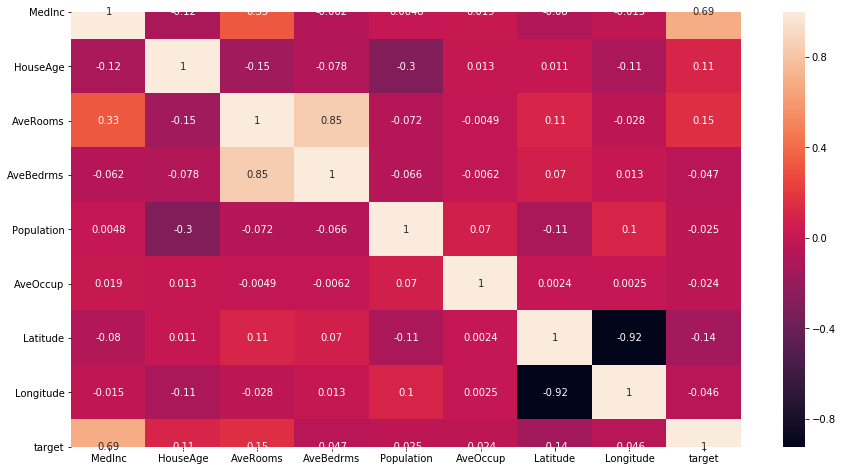

In [10]:
#Checking for correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Target is highly correlated with Medinc

In [11]:
#Checking for description

data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


As we can see, there is huge difference between mean and max for AveBedrms, Population, AveOccup. This shows that outliers are present in dataset.

MedInc           AxesSubplot(0.125,0.536818;0.133621x0.343182)
HouseAge      AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AveRooms       AxesSubplot(0.44569,0.536818;0.133621x0.343182)
AveBedrms     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Population    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
AveOccup            AxesSubplot(0.125,0.125;0.133621x0.343182)
Latitude         AxesSubplot(0.285345,0.125;0.133621x0.343182)
Longitude         AxesSubplot(0.44569,0.125;0.133621x0.343182)
target           AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

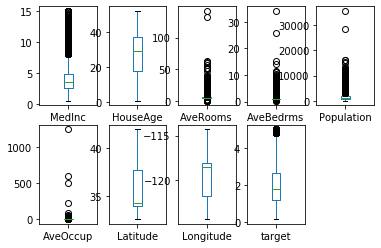

In [12]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,5))

AveRooms, Population, AveOccup having outliers

In [13]:
data.shape

(20640, 9)

In [14]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [15]:
data.shape

(19794, 9)

### SPLITTING DATA

In [16]:
x = data.drop(['target'],axis=1)
y = data.target

In [17]:
#Checking for skewness 

x.skew()

MedInc        0.786048
HouseAge      0.046496
AveRooms      0.555865
AveBedrms     3.913734
Population    1.346151
AveOccup      5.789707
Latitude      0.460162
Longitude    -0.292814
dtype: float64

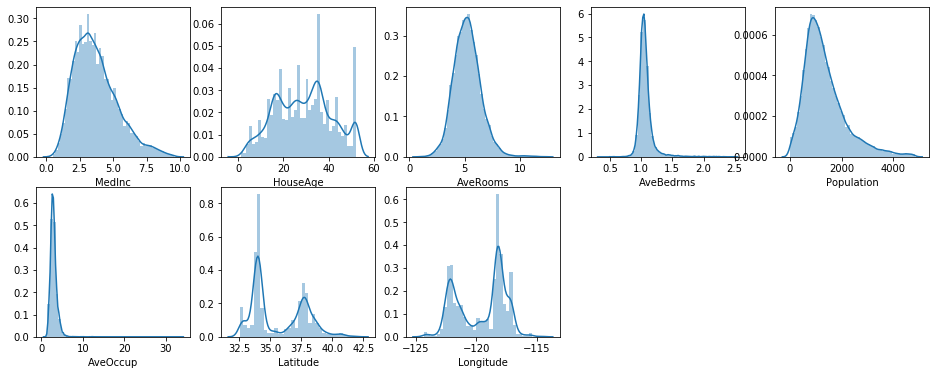

In [18]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

As we can see, few features are having skewness

In [19]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.sqrt(x[index])

In [20]:
#Checking for skewness 

x.skew()

MedInc        0.245009
HouseAge      0.046496
AveRooms      0.036389
AveBedrms     2.976989
Population    0.386053
AveOccup      1.708367
Latitude      0.460162
Longitude    -0.292814
dtype: float64

In [21]:
#Scaling x with StandardScaler
ss=SS()
ss.fit(x)
x=ss.transform(x)

### TRAIN AND TEST MODEL

In [22]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,random_state=42)

In [23]:
# validate set shapes
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(14845, 8) (14845,)
(4949, 8) (4949,)


In [24]:
#Implementing Hold out validation

start_ho = timer()


#Implementing Linear Regression
lr=LR()
lr.fit(train_x,train_y)
pred_y=lr.predict(test_x)
print("r2_score is: ", r2_score(test_y,pred_y))

end_ho = timer()

# calcualte function runtime
time_ho = (end_ho - start_ho)

print('Run time', time_ho)

r2_score is:  0.6030962755950637
Run time 0.0060952000000007445


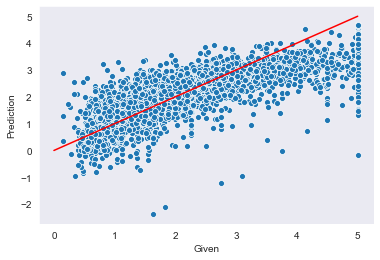

In [25]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(test_y, pred_y)
plot.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

### CROSS VALIDATION

In [26]:
start_ho = timer()

lr = LR()

score = cross_val_score(lr,x,y,cv=10,scoring="r2")
print('r2 Score: ', score)
print("Mean r2 score: ",round(score.mean()*100))
print('Standard deviation: ',score.std())
end_ho = timer()
print("Run time for cross validation ", (end_ho-start_ho))

r2 Score:  [0.44973727 0.58805394 0.48829464 0.49071498 0.62984526 0.52276005
 0.47104757 0.52129239 0.46404241 0.53127246]
Mean r2 score:  52.0
Standard deviation:  0.05382990429203088
Run time for cross validation  0.11449069999999928


-0.49243719084159376


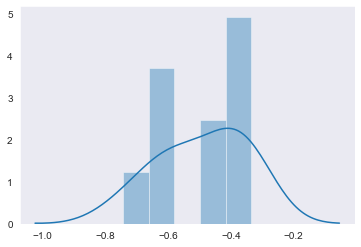

In [27]:
#PLotting k fold into graph

kfold_score_start = timer()
# find the mean score from the k-fold models usinf cross_val_score
kfold_scores = cross_val_score(lr,x, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)
# plot scores
sns.distplot(kfold_scores, bins=5)

Score is farther than 0

#### USING LOOCV

In [28]:
start_loocv = timer()

score = cross_val_score(lr,x,y,cv=len(x),scoring="neg_mean_squared_error")
print('r2 Score: ', score)
print("Mean r2 score: ",round(score.mean()*100))
print('Standard deviation: ',score.std())
end_loocv = timer()
print("Run time for LOOCV validation:", (end_loocv-start_loocv))

r2 Score:  [-0.29600354 -0.15831675 -0.00768318 ... -0.6008418  -0.17453211
 -0.09515539]
Mean r2 score:  -47.0
Standard deviation:  1.061126008716548
Run time for LOOCV validation: 199.83093549999998


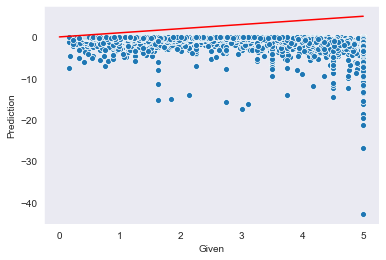

In [29]:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y, score)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

As we can see LOOCV takes more time to run. As it run for length of x. It is more useful for data having low numbers.

### CONCLUSION

In this project, I have fetched data from sklearn datasets, merged all features as one dataset using dataframe. 

In this, I've checked for correlation and description of dataset found that Target is highly correlated with Medinc in correlation and huge difference between mean and max for AveBedrms, Population, AveOccup in description.

Then removed some outliers and skewness from data. Also scaled it using Standard Scaler for Linear Regression.

In this, I've used Linear Regression as show in ref link and implemented Hold out method, K-Fold Cross validation and LOOCV, and found that Hold out method was effective and inexpensive on large dataset.

By using K-Fold Cross Validation, found that it was very effective on medium dataset. It can give best result with cross fold.

By using LOOCV, I observed it takes more time to run on large dataset, and not very effective, it can give best result on small dataset.